# 1. Loading libraries and data

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00


In [1]:
!pip install mljar-supervised

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.9/126.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.3 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised

In [2]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [3]:
!pip install catboost

In [4]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [5]:
# seaborn과 matplotlib에 폰트 설정 적용
sns.set(font="NanumGothic", rc={"axes.unicode_minus": False}, style='white')

In [6]:
import pandas as pd
import numpy as np
import missingno
from scipy.stats import norm, probplot

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import optuna

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
# from supervised import AutoML

import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/dacon/dacon_weblog/'

In [9]:
# 데이터 불러오기
train = pd.read_csv(file_path + 'train.csv')
test = pd.read_csv(file_path + 'test.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

#### 데이터 설명  
한 세션에서 발생한 다양한 정보를 기록한 웹 로그 데이터
- sessionID : 세션 ID  
- userID : 사용자 ID  
- TARGET : 세션에서 발생한 총 조회수  
- browser : 사용된 브라우저   
- OS : 사용된 기기의 운영체제  
- device : 사용된 기기
- new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)
- quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)
- duration : 총 세션 시간 (단위: 초)
- bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)
- transaction : 세션 내에서 발생의 거래의 수
- transaction_revenue : 총 거래 수익
- continent : 세션이 발생한 대륙
- subcontinent : 세션이 발생한 하위 대륙
- country : 세션이 발생한 국가
- traffic_source : 트래픽이 발생한 소스
- traffic_medium : 트래픽 소스의 매체
- keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정
- referral_path : traffic_medium이 referral인 경우 설정되는 경로

In [ ]:
train.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [ ]:
train.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


# 2. EDA

## 2-1. 수치형 변수

In [ ]:
# 수치형 변수 불러오기
numeric_df = train[['TARGET','quality','duration','transaction','transaction_revenue']]

In [ ]:
# 정규성, 데이터 분포 확인 위한 QQ_plot 시각화 함수
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    (mu, sigma) = norm.fit(data)

    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
   # QQ_plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

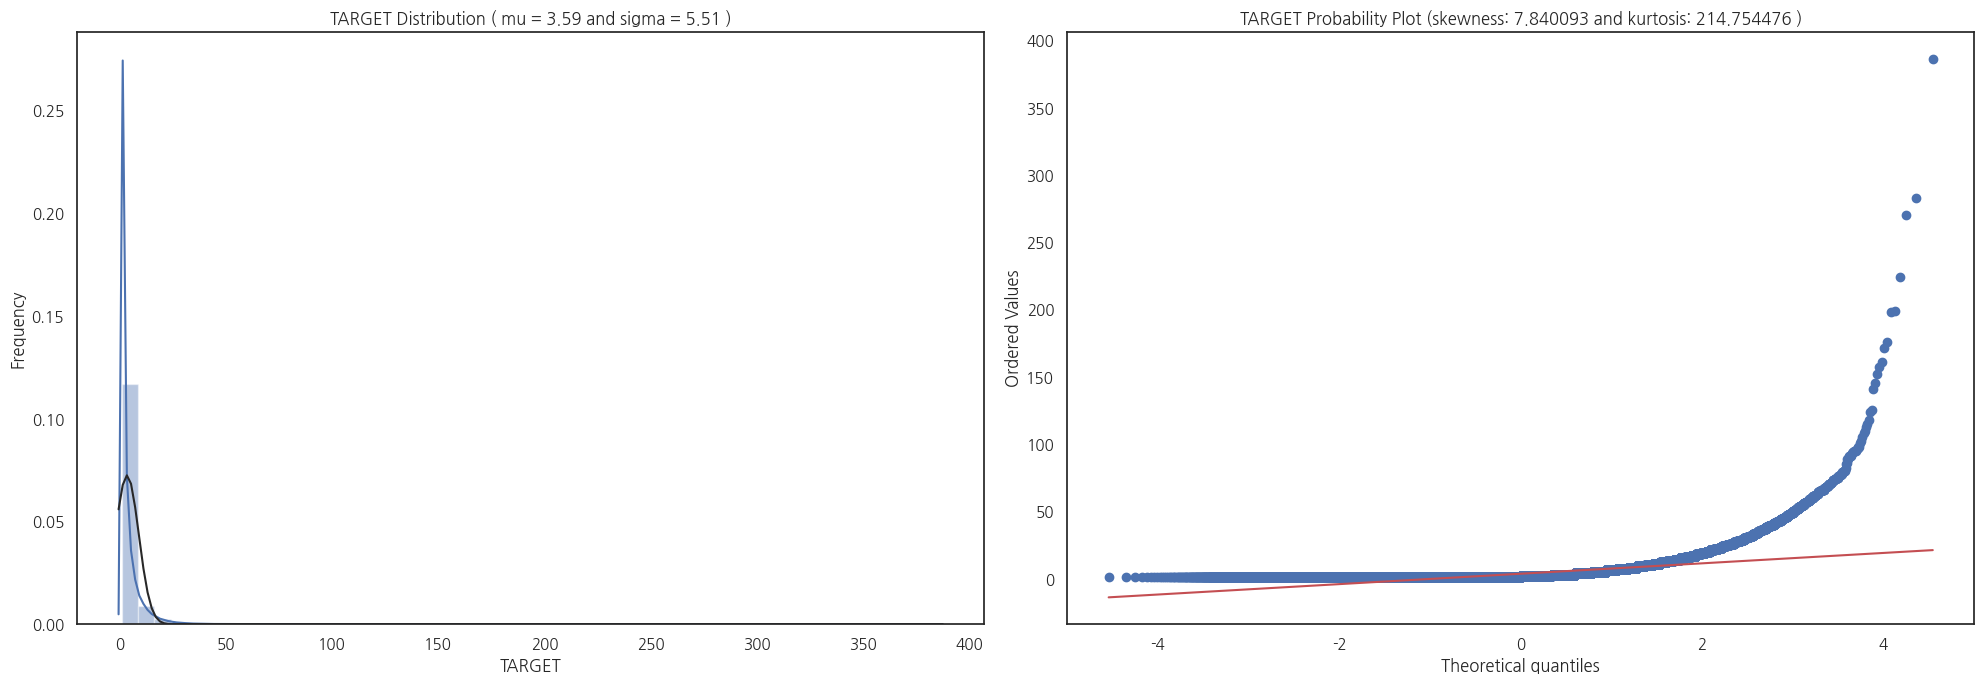

In [ ]:
# TARGET 변수 분포 확인
QQ_plot(train.TARGET, 'TARGET')

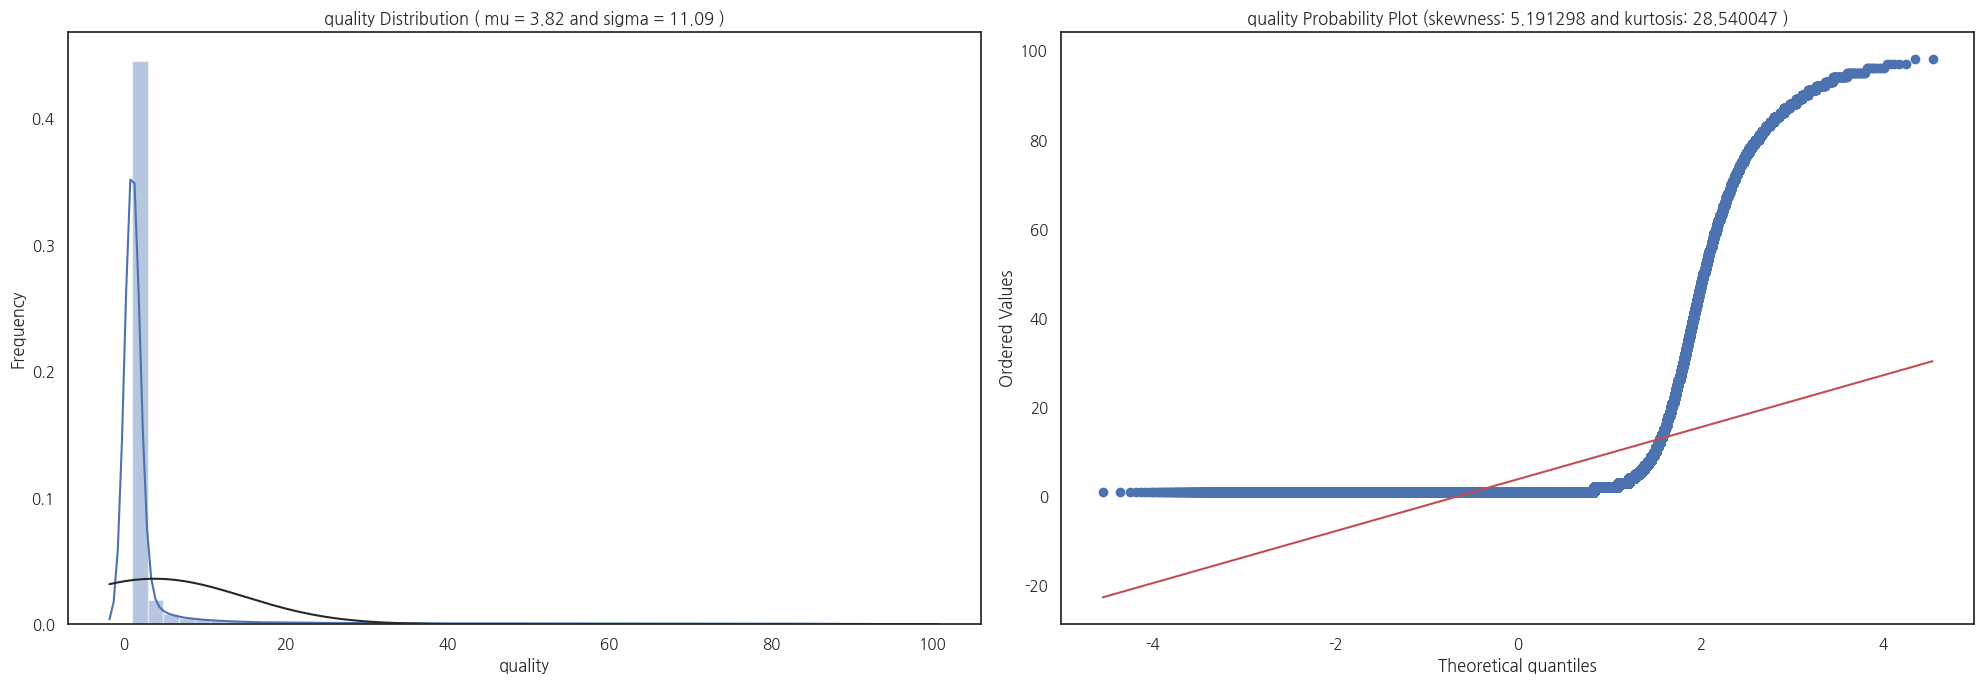

In [ ]:
# quality 변수 분포 확인
QQ_plot(train.quality, 'quality')

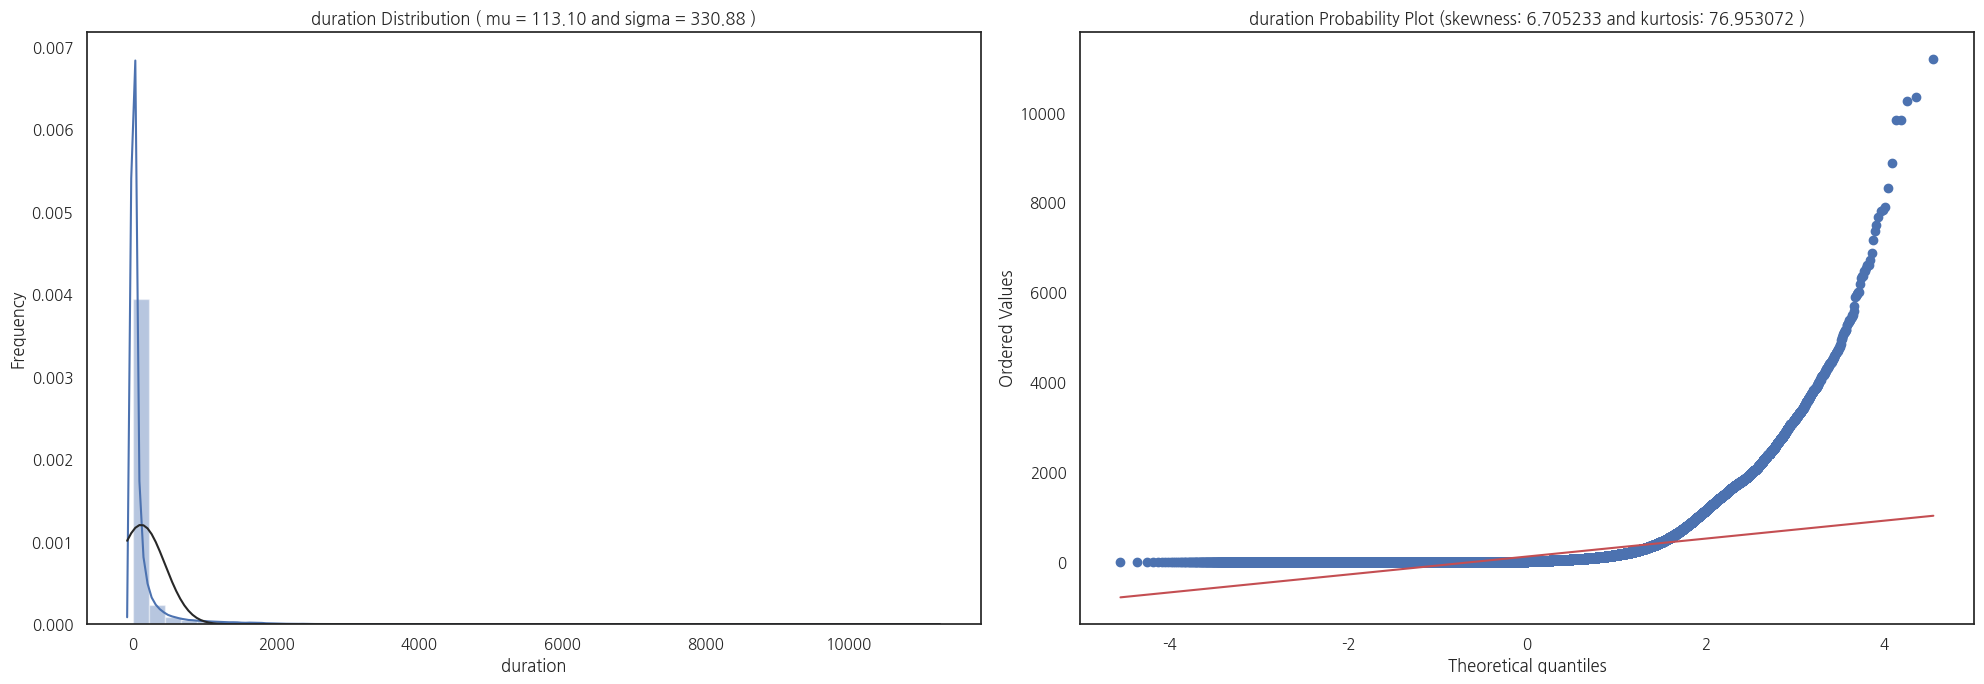

In [ ]:
# duration 변수 분포 확인
QQ_plot(train.duration, 'duration')

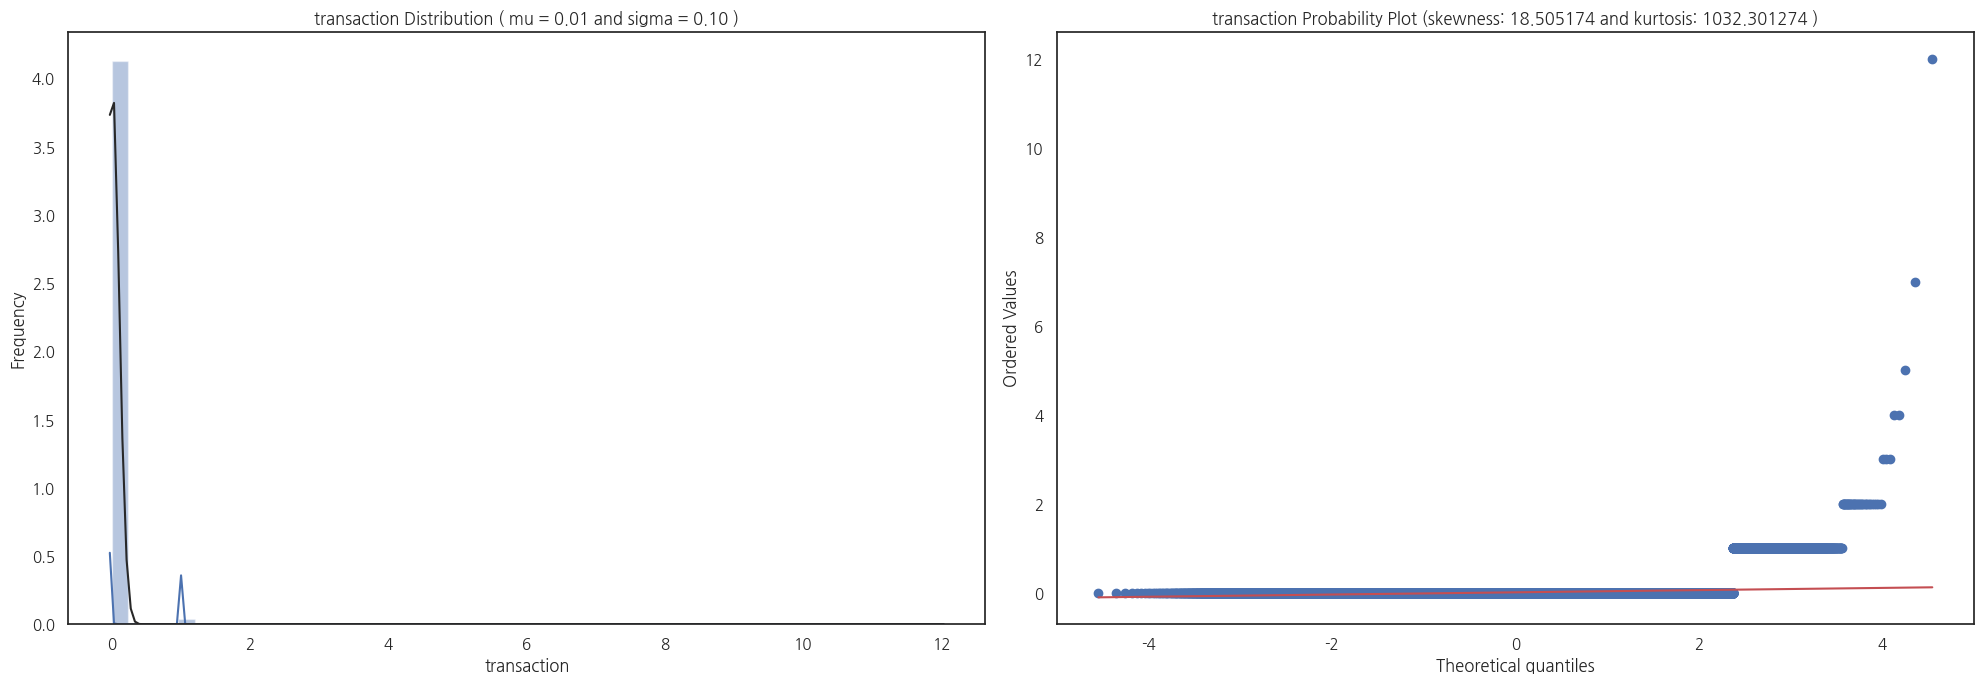

In [ ]:
# transaction 변수 분포 확인
QQ_plot(train.transaction, 'transaction')

In [ ]:
train['transaction'].unique()

array([ 0.,  1.,  2.,  3.,  5.,  7.,  4., 12.])

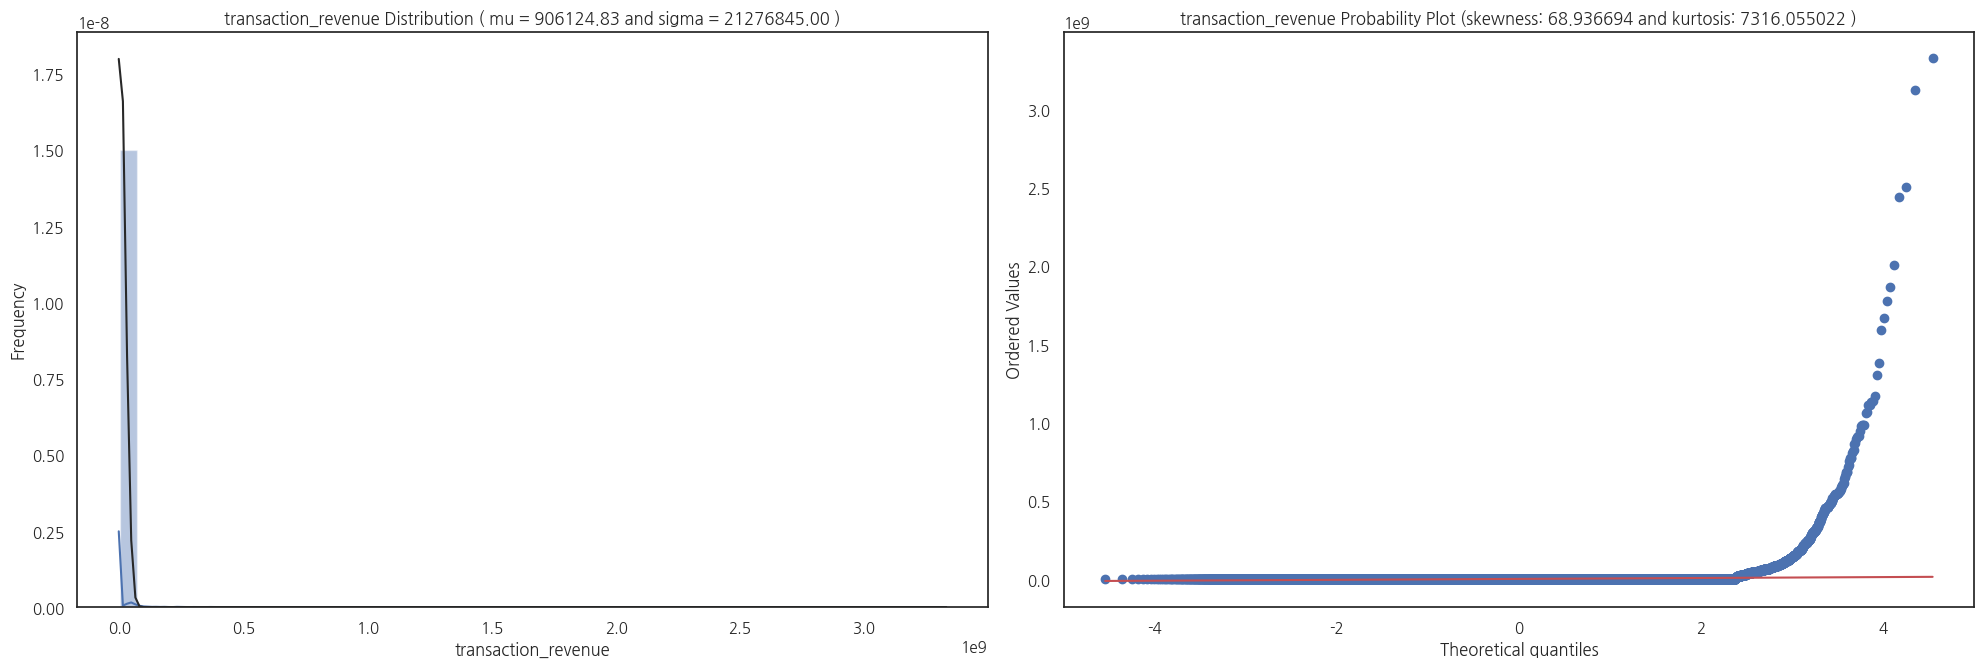

In [ ]:
# transaction_revenue 변수 분포 확인
QQ_plot(train.transaction_revenue, 'transaction_revenue')

<Axes: >

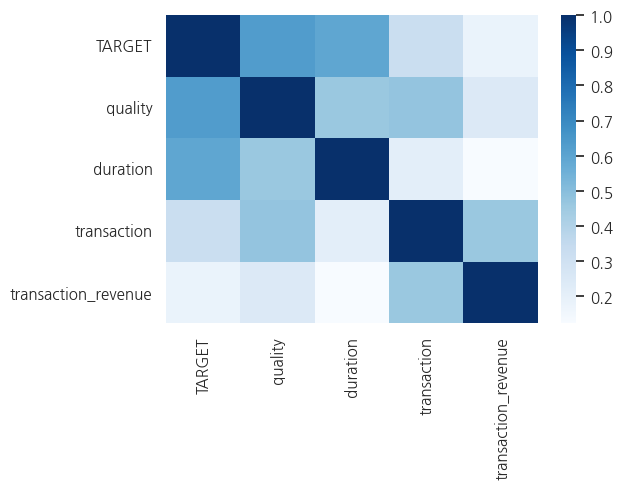

In [ ]:
# Seaborn Heatmap 을 사용한 Correlation 시각화
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(),cmap='Blues')

In [ ]:
# 데이터프레임에서 수치형 변수들만 선택
numeric_cols = train.select_dtypes(include=['int64', 'float64'])


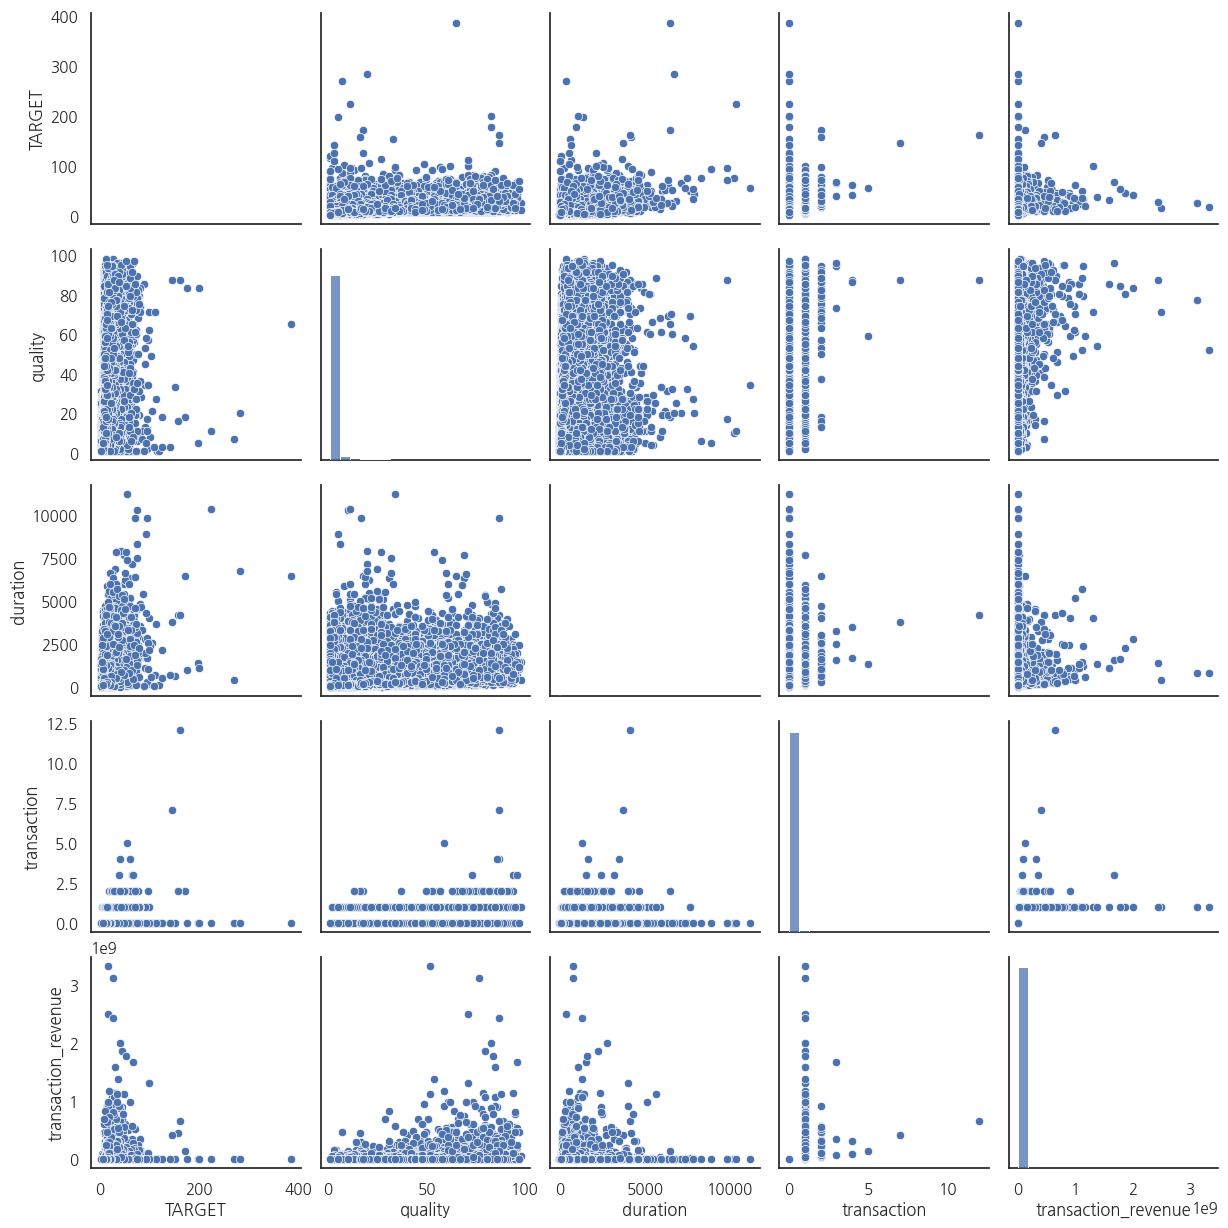

In [ ]:
# pairplot 그리기
sns.pairplot(data=numeric_df)
plt.show()

In [ ]:
train['TARGET'].describe()['75%']

4.0

## 2-2. 범주형 변수

In [ ]:
# 범주형 변수 불러오기
categoric_df = train.drop(columns = ['TARGET','quality','duration','transaction','transaction_revenue'],axis=1)

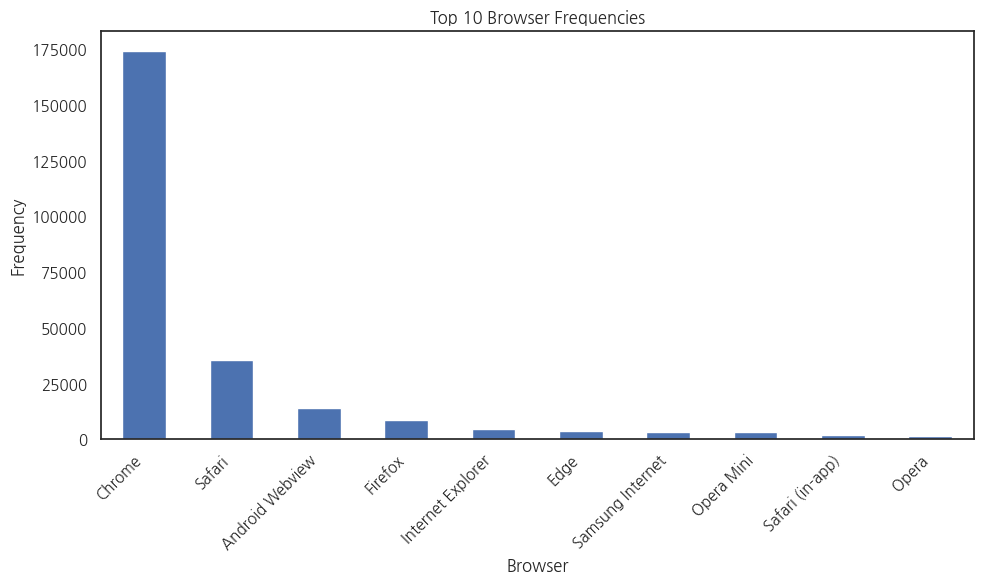

In [ ]:
# browser 빈도 수 그래프(상위 10개)
value_counts = categoric_df['browser'].value_counts().head(10)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Top 10 Browser Frequencies')
plt.xlabel('Browser')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()  # 그래프 여백 조정
plt.show()


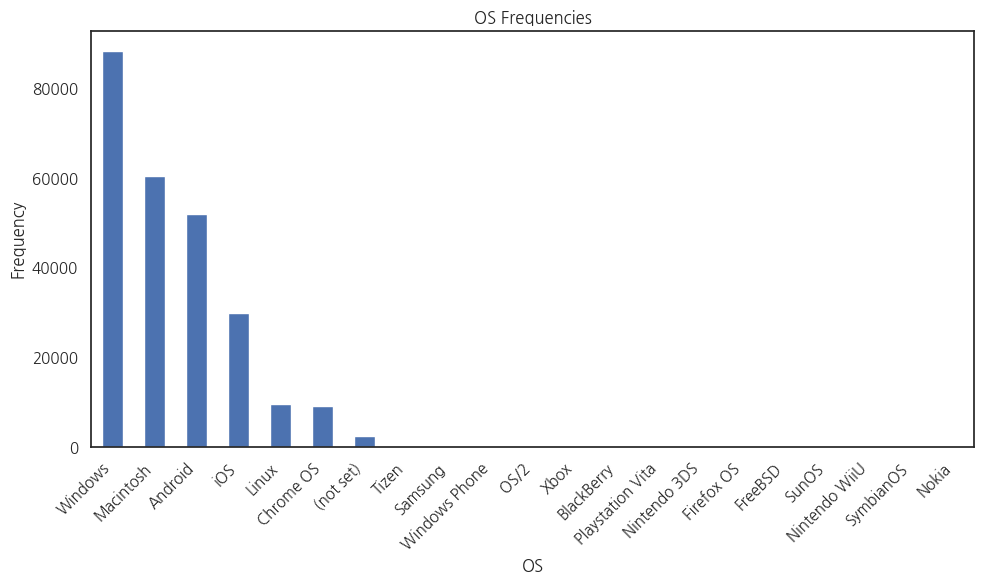

In [ ]:
# OS 빈도수 그래프
value_counts = categoric_df['OS'].value_counts()
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('OS Frequencies')
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()  # 그래프 여백 조정
plt.show()


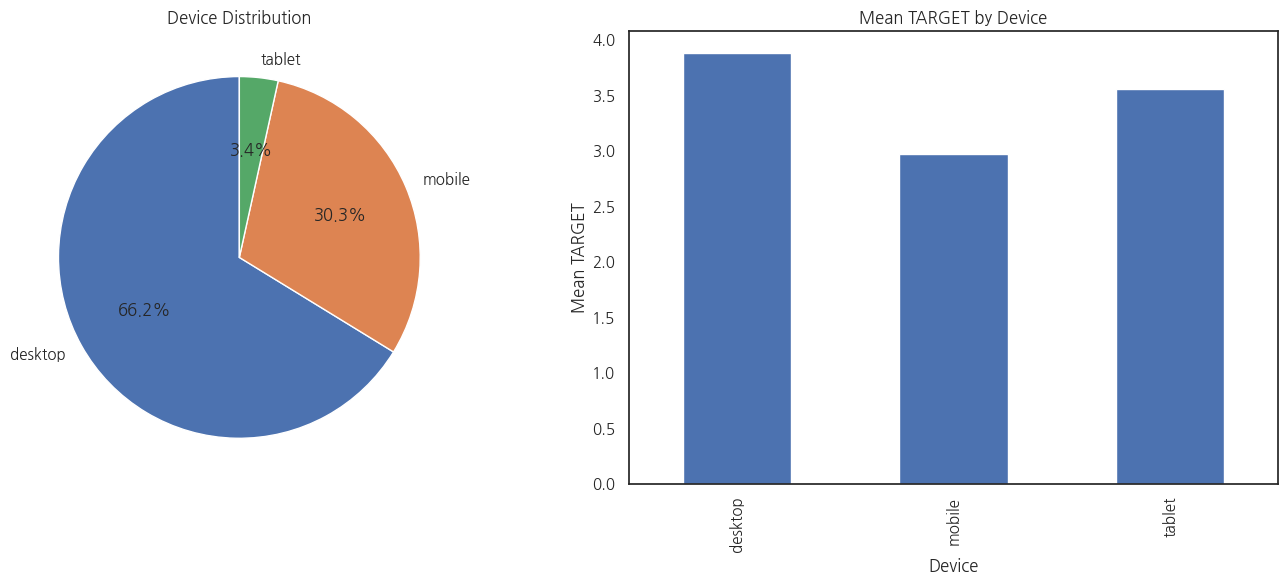

In [ ]:
# device 열의 값별 빈도수 계산
device_counts = categoric_df['device'].value_counts()

# device 열의 값별 TARGET의 평균 계산
device_mean = train.groupby('device')['TARGET'].mean()

# 그래프 영역 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 파이차트 그리기
ax[0].pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Device Distribution')

# 막대 그래프 그리기
device_mean.plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean TARGET by Device')
ax[1].set_xlabel('Device')
ax[1].set_ylabel('Mean TARGET')

plt.tight_layout()
plt.show()



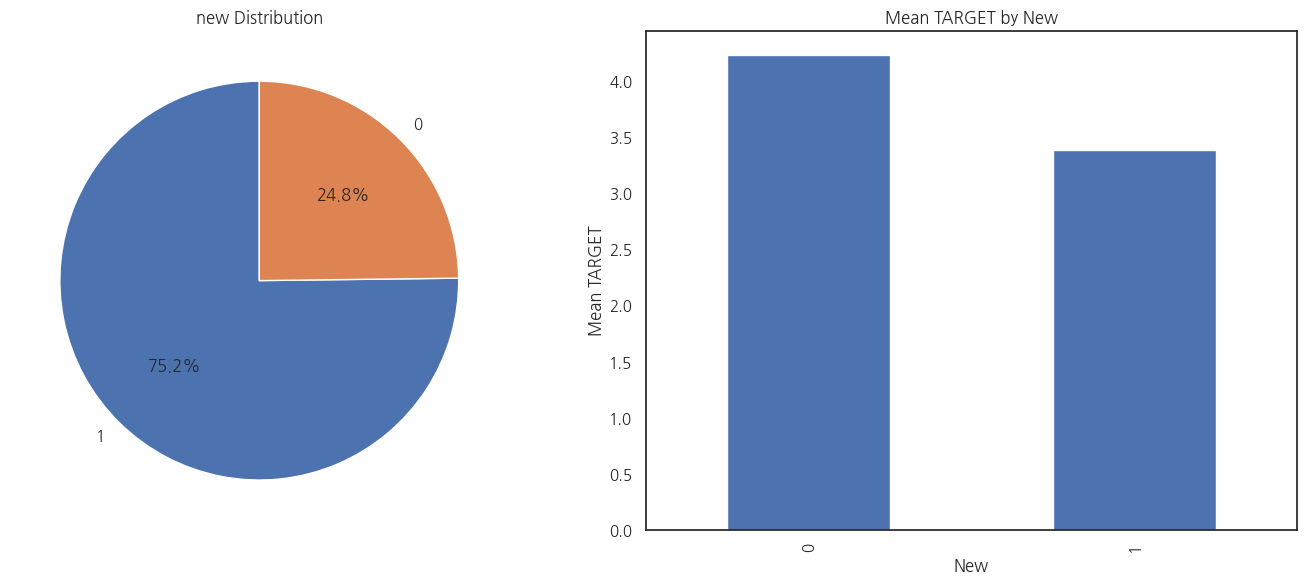

In [ ]:
# new 열의 값별 빈도수 계산
new_counts = categoric_df['new'].value_counts()

# new 열의 값별 TARGET의 평균 계산
new_mean = train.groupby('new')['TARGET'].mean()

# 그래프 영역 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 파이차트 그리기
ax[0].pie(new_counts, labels=new_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('new Distribution')

# 막대 그래프 그리기
new_mean.plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean TARGET by New')
ax[1].set_xlabel('New')
ax[1].set_ylabel('Mean TARGET')

plt.tight_layout()
plt.show()



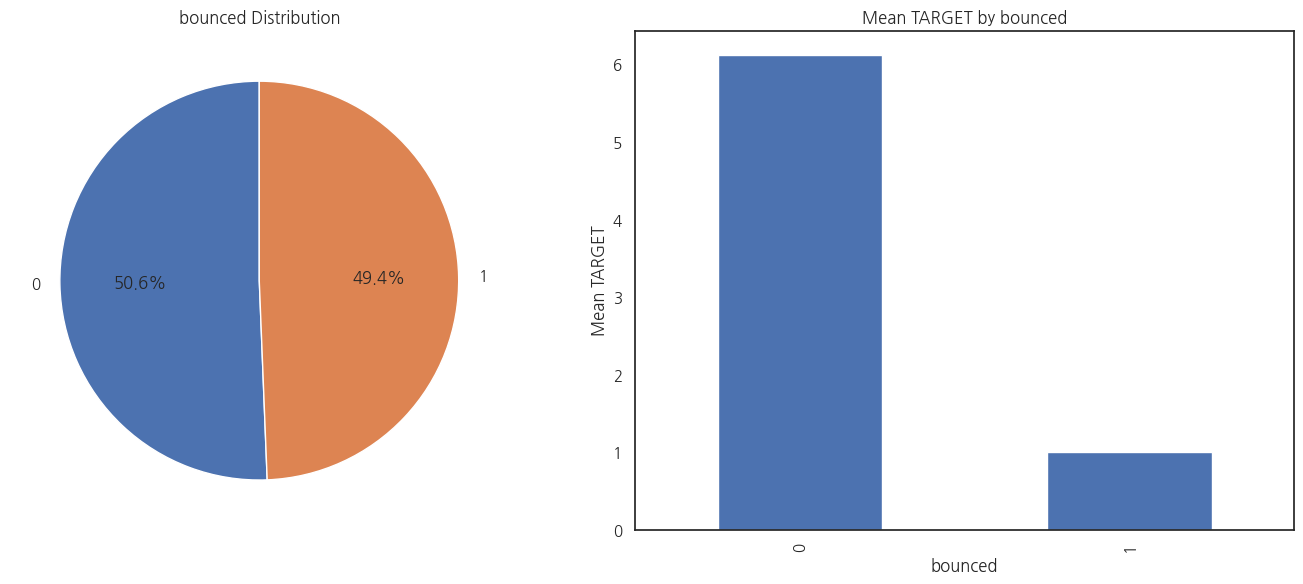

In [ ]:
# bounced 열의 값별 빈도수 계산
bounced_counts = categoric_df['bounced'].value_counts()

# device 열의 값별 TARGET의 평균 계산
bounced_mean = train.groupby('bounced')['TARGET'].mean()

# 그래프 영역 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 파이차트 그리기
ax[0].pie(bounced_counts, labels=bounced_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('bounced Distribution')

# 막대 그래프 그리기
bounced_mean.plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean TARGET by bounced')
ax[1].set_xlabel('bounced')
ax[1].set_ylabel('Mean TARGET')

plt.tight_layout()
plt.show()



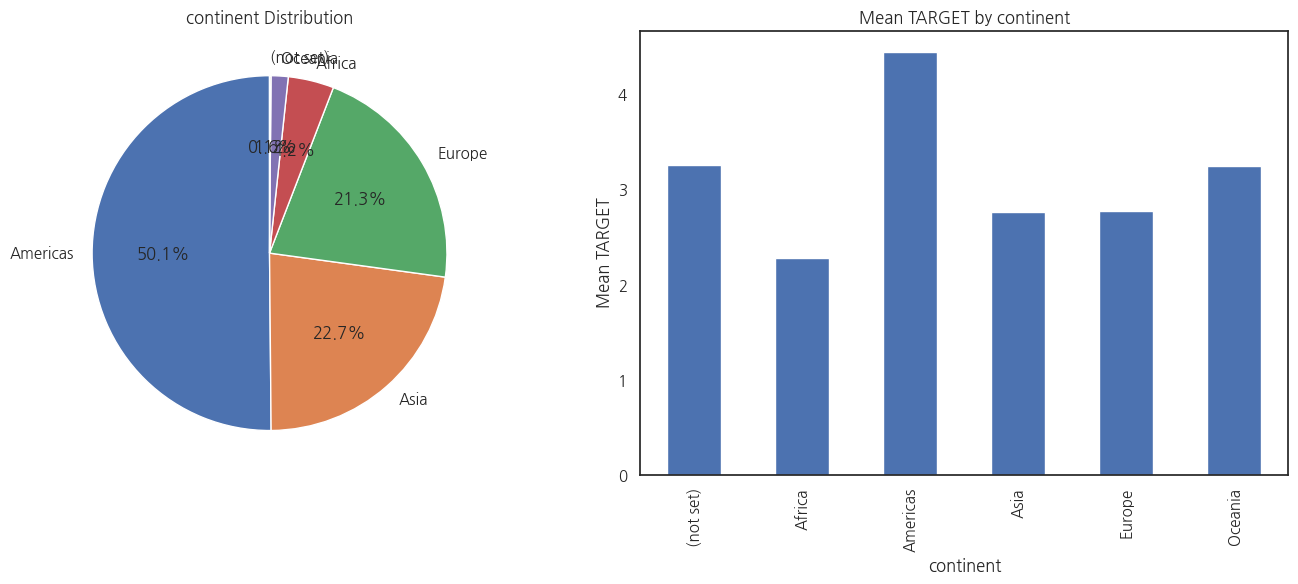

In [ ]:
# continent 열의 값별 빈도수 계산
continent_counts = categoric_df['continent'].value_counts()

# device 열의 값별 TARGET의 평균 계산
continent_mean = train.groupby('continent')['TARGET'].mean()

# 그래프 영역 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 파이차트 그리기
ax[0].pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('continent Distribution')

# 막대 그래프 그리기
continent_mean.plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean TARGET by continent')
ax[1].set_xlabel('continent')
ax[1].set_ylabel('Mean TARGET')

plt.tight_layout()
plt.show()


In [ ]:
categoric_df['subcontinent'].value_counts()

Northern America      111945
Southern Asia          21744
Western Europe         18325
Northern Europe        15432
Southeast Asia         13977
Eastern Asia           13598
Southern Europe        10752
South America           9791
Eastern Europe          9239
Western Asia            7677
Northern Africa         5534
Central America         4201
Australasia             3895
Southern Africa         2164
Western Africa          1971
Eastern Africa           655
Caribbean                569
(not set)                336
Central Asia             258
Middle Africa            190
Micronesian Region        18
Melanesia                 10
Polynesia                  8
Name: subcontinent, dtype: int64

In [ ]:
categoric_df['country'].value_counts()

United States               104201
India                        19300
United Kingdom               10019
Canada                        7735
Germany                       6319
                             ...  
St. Kitts & Nevis                1
Syria                            1
Bhutan                           1
Northern Mariana Islands         1
Vanuatu                          1
Name: country, Length: 205, dtype: int64

In [ ]:
categoric_df['traffic_source'].value_counts().head(20)

google                  116007
(direct)                 59026
youtube.com              52871
analytics.google.com      7609
Partners                  5369
sites.google.com          2507
google.com                1222
bing                       704
reddit.com                 681
qiita.com                  548
quora.com                  503
mail.google.com            480
baidu                      460
dfa                        436
away.vk.com                379
groups.google.com          315
plus.url.google.com        298
facebook.com               265
m.facebook.com             265
support.google.com         242
Name: traffic_source, dtype: int64

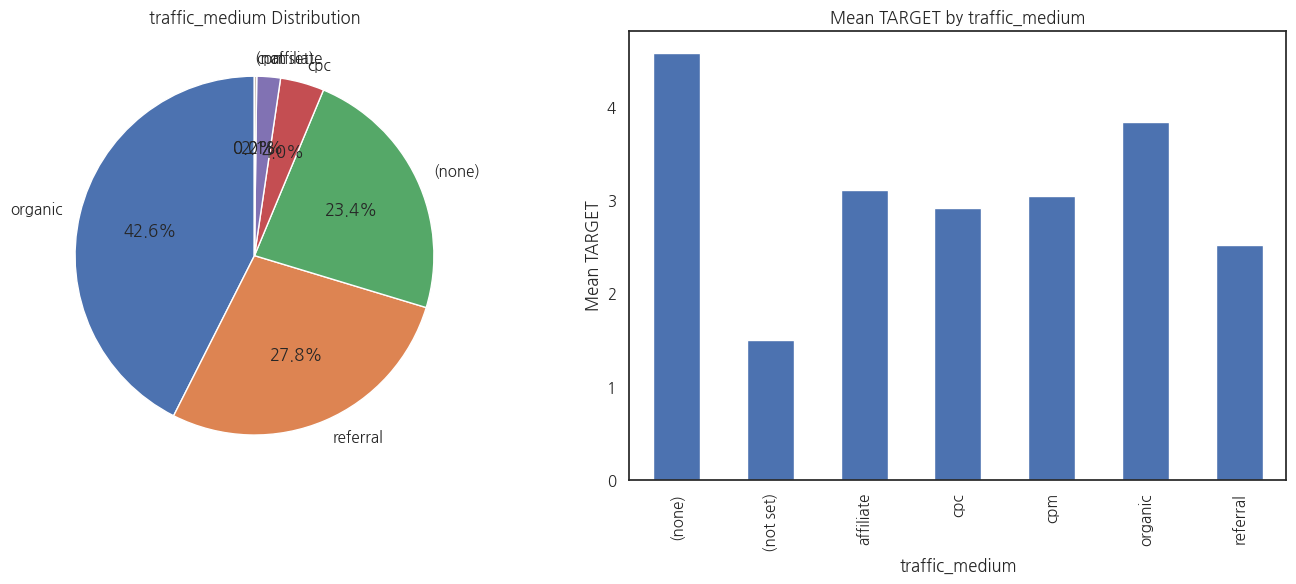

In [ ]:
# traffic_medium 열의 값별 빈도수 계산
traffic_medium_counts = categoric_df['traffic_medium'].value_counts()

# device 열의 값별 TARGET의 평균 계산
traffic_medium_mean = train.groupby('traffic_medium')['TARGET'].mean()

# 그래프 영역 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 파이차트 그리기
ax[0].pie(traffic_medium_counts, labels=traffic_medium_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('traffic_medium Distribution')

# 막대 그래프 그리기
traffic_medium_mean.plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean TARGET by traffic_medium')
ax[1].set_xlabel('traffic_medium')
ax[1].set_ylabel('Mean TARGET')

plt.tight_layout()
plt.show()


In [ ]:
train.groupby('referral_path')['TARGET'].mean().sort_values(ascending=False)

referral_path
Category6_Path_1415     46.0
Category11_Path_0731    40.0
Category13_Path_1252    33.0
Category11_Path_1082    29.5
Category9_Path_1346     27.0
                        ... 
Category2_Path_0561      1.0
Category2_Path_0583      1.0
Category2_Path_0607      1.0
Category2_Path_0639      1.0
Category13_Path_1230     1.0
Name: TARGET, Length: 1579, dtype: float64

In [ ]:
train['referral_path_cat'] = train['referral_path'].apply(lambda x: x.split('_')[0])
test['referral_path_cat'] = test['referral_path'].apply(lambda x: x.split('_')[0])

In [ ]:
train.groupby('referral_path_cat')['TARGET'].mean().sort_values(ascending=False)

referral_path_cat
Category1     6.501258
Category10    4.480218
Category9     4.447750
Category6     3.900116
NAN           3.704302
Category12    3.557648
Category3     3.012902
Category8     2.785777
Category7     2.479656
Category11    2.398438
Category5     2.161352
Category2     2.108537
Category4     1.973447
Category13    1.940051
Name: TARGET, dtype: float64

In [ ]:
train.groupby('keyword')['TARGET'].mean().sort_values(ascending=False)

keyword
Category1_Keyword_140    28.0
Category2_Keyword_591    20.0
Category4_Keyword_292    18.0
Category3_Keyword_411    18.0
Category3_Keyword_393    16.0
                         ... 
Category2_Keyword_461     1.0
Category2_Keyword_459     1.0
Category2_Keyword_242     1.0
Category2_Keyword_455     1.0
Category2_Keyword_206     1.0
Name: TARGET, Length: 624, dtype: float64

In [ ]:
train['keyword_cat'] = train['keyword'].apply(lambda x: x.split('_')[0])
test['keyword_cat'] = test['keyword'].apply(lambda x: x.split('_')[0])

In [ ]:
train.groupby('keyword_cat')['TARGET'].mean().sort_values(ascending=False)

keyword_cat
Category6     5.694915
Category1     5.476480
Category3     5.224832
Category5     4.276596
Category8     3.857970
NAN           3.450561
Category11    3.144485
Category2     2.771131
Category4     2.676617
Category10    1.625981
Category12    1.291457
Category9     1.263761
Category7     1.140625
Name: TARGET, dtype: float64

# 3. DATA Preprocessing

In [11]:
# 필요없는 컬럼 제거
train = train.drop(columns=['sessionID','userID'],axis=1)
test = test.drop(columns=['sessionID','userID'],axis=1)

In [12]:
# TARGET 값 분리
target = train['TARGET']
train.drop(['TARGET'],axis=1, inplace=True)

## 3-1. 결측값 처리

<Axes: >

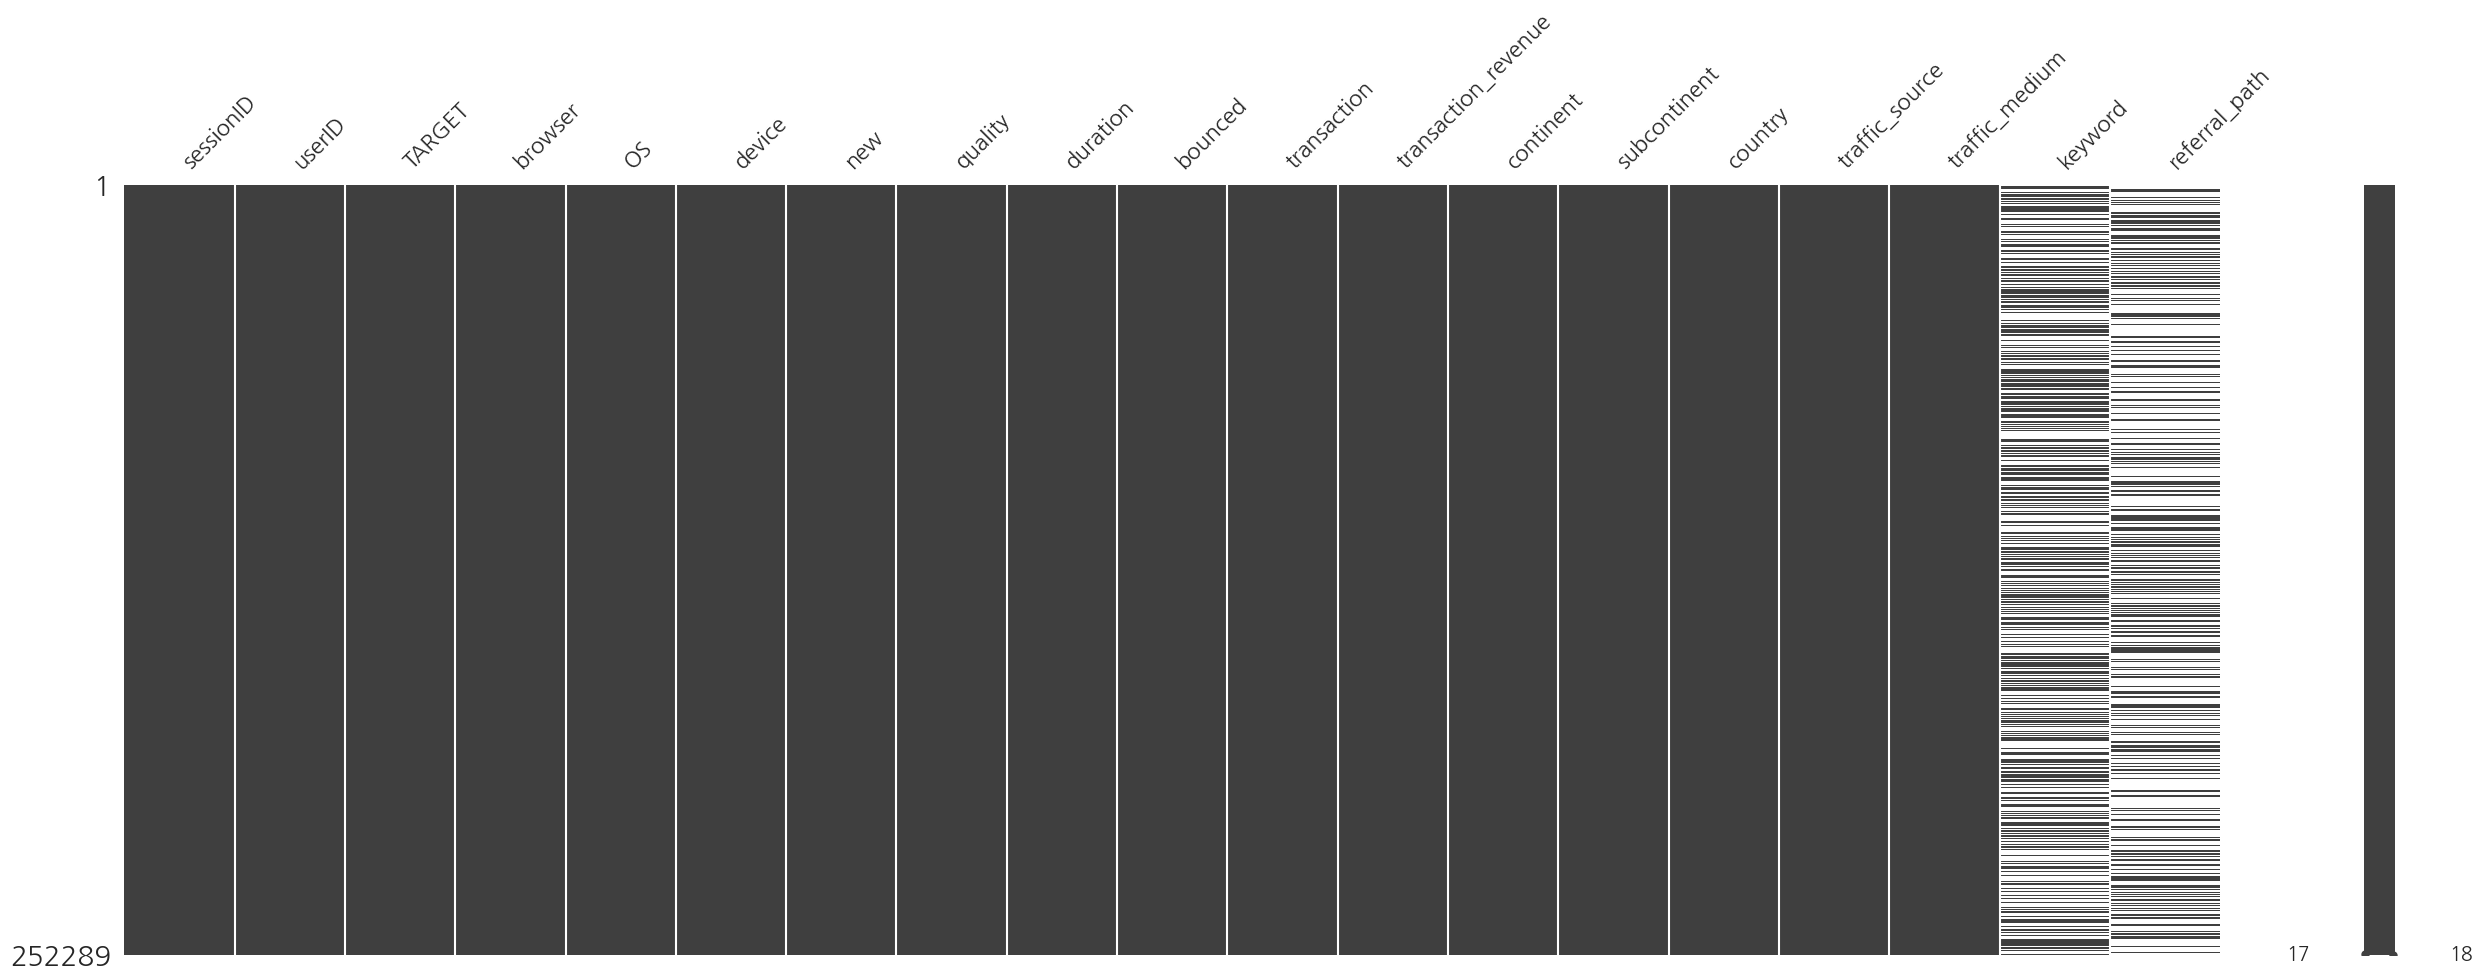

In [ ]:
# missingno 패키지를 통해 확인
missingno.matrix(train, figsize = (30,10))

<Axes: >

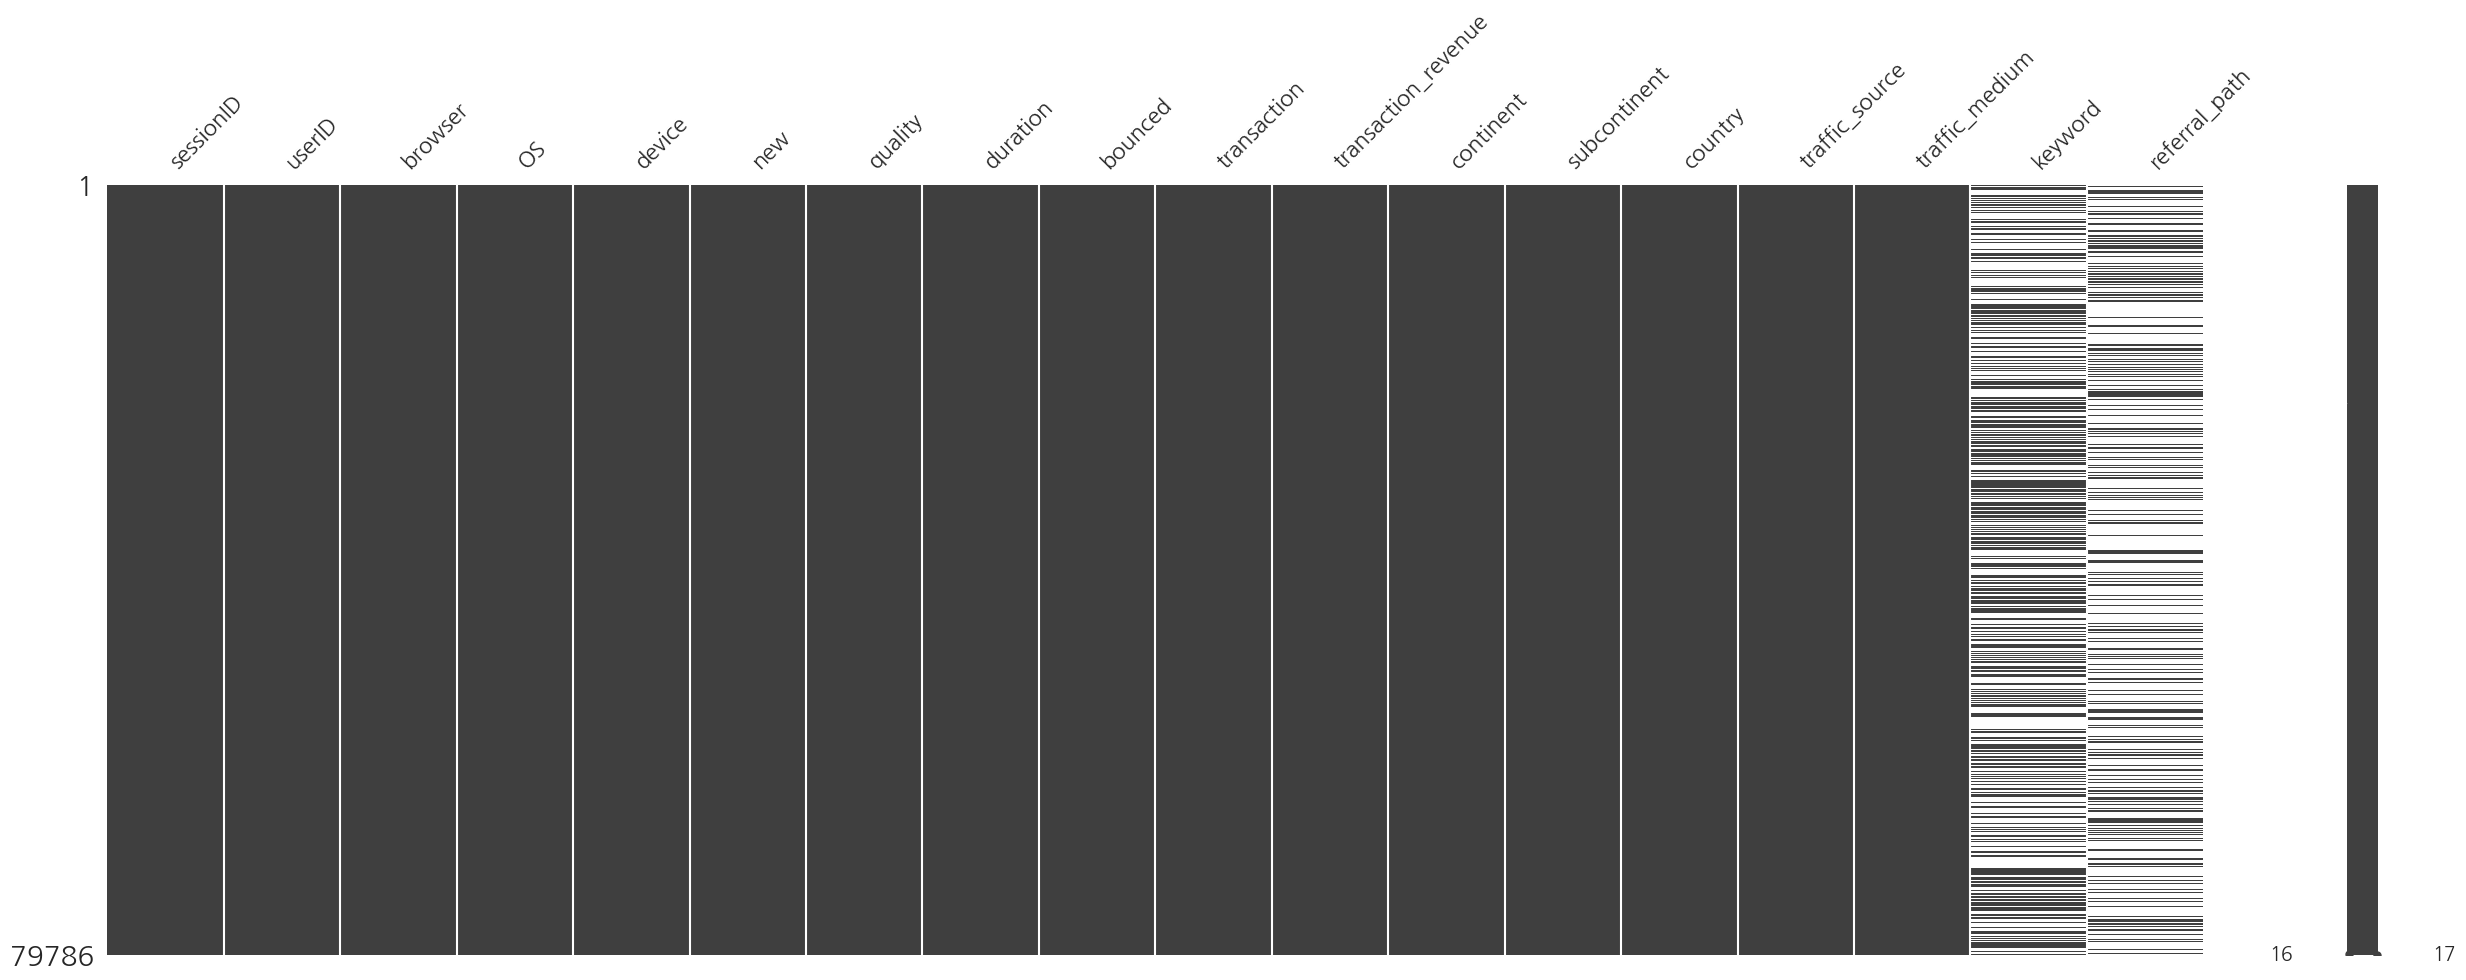

In [ ]:
# missingno 패키지를 통해 확인
missingno.matrix(test, figsize = (30,10))

In [ ]:
# train 데이터 결측값 비율 확인
train.isnull().sum() / len(train)

sessionID              0.000000
userID                 0.000000
TARGET                 0.000000
browser                0.000000
OS                     0.000000
device                 0.000000
new                    0.000000
quality                0.000000
duration               0.000000
bounced                0.000000
transaction            0.000000
transaction_revenue    0.000000
continent              0.000000
subcontinent           0.000000
country                0.000000
traffic_source         0.000000
traffic_medium         0.000000
keyword                0.545704
referral_path          0.638581
dtype: float64

In [ ]:
# train 데이터 결측값 비율 확인
test.isnull().sum() / len(test)

sessionID              0.000000
userID                 0.000000
browser                0.000000
OS                     0.000000
device                 0.000000
new                    0.000000
quality                0.000000
duration               0.000000
bounced                0.000000
transaction            0.000000
transaction_revenue    0.000000
continent              0.000000
subcontinent           0.000000
country                0.000000
traffic_source         0.000000
traffic_medium         0.000000
keyword                0.539819
referral_path          0.675444
dtype: float64

웹 로그 특성상 해당 변수들의 결측치가 가지고 있는 의미가 있을 거라 판단해 특정 문자열로 채워넣음

In [13]:
train.fillna('NAN',inplace=True)
test.fillna('NAN',inplace=True)

## 3-2. 수치형 변수 처리

In [14]:
num_train = train[['quality','duration','transaction','transaction_revenue','new','bounced']]
num_test = test[['quality','duration','transaction','transaction_revenue','new','bounced']]

In [15]:
# transaction 제외, 좌측으로 쏠린 분포를 가지고 있어 로그 변환을 통해 정규화 진행
num_train[['quality','duration','transaction_revenue']] = np.log1p(num_train[['quality','duration','transaction_revenue']])
num_test[['quality','duration','transaction_revenue']] = np.log1p(num_test[['quality','duration','transaction_revenue']])

In [16]:
# StandardScaler
ss = StandardScaler()
num_train[['quality','duration','transaction','transaction_revenue','new','bounced']] = ss.fit_transform(num_train[['quality','duration','transaction','transaction_revenue','new','bounced']])
num_test[['quality','duration','transaction','transaction_revenue','new','bounced']] = ss.transform(num_test[['quality','duration','transaction','transaction_revenue','new','bounced']])

## 3-3. 범주형 변수 처리

실험 결과 원핫인코딩을 수행하는 것보다 전부 레이블 인코딩 처리하는 것이 더 성능이 좋은 것을 알 수 있었음  
-> 레이블 인코딩 처리

In [ ]:
# train['referral_path_cat'] = train['referral_path'].apply(lambda x: x.split('_')[0])
# test['referral_path_cat'] = test['referral_path'].apply(lambda x: x.split('_')[0])

In [ ]:
# train['keyword_cat'] = train['keyword'].apply(lambda x: x.split('_')[0])
# test['keyword_cat'] = test['keyword'].apply(lambda x: x.split('_')[0])

In [17]:
cat_train = train[['browser','OS','device','subcontinent','traffic_source','traffic_medium','referral_path','keyword']]
cat_test = test[['browser','OS','device','subcontinent','traffic_source','traffic_medium','referral_path','keyword']]

특정 컬럼들 안에 유니크한 값이 너무 많은 경우 존재.  
-> 따로 처리를 해줄 필요가 있음

In [ ]:
cat_train.nunique()

browser               70
OS                    21
device                 3
subcontinent          23
traffic_source       168
traffic_medium         7
referral_path_cat     14
keyword_cat           13
dtype: int64

In [ ]:
# # browser 컬럼에서 상위 18개 외는 etc로 저장
# topn_browser = cat_train['browser'].value_counts().head(18).index.to_list()
# cat_train['browser'] = ['browser_etc' if value not in topn_browser else value for value in cat_train['browser']]
# cat_test['browser'] = ['browser_etc' if value not in topn_browser else value for value in cat_test['browser']]

In [ ]:
# cat_train_dum = cat_train[['browser','device','subcontinent','traffic_medium','referral_path_cat','keyword_cat']]
# cat_test_dum = cat_test[['browser','device','subcontinent','traffic_medium','referral_path_cat','keyword_cat']]
# cat_train_label = cat_train[['OS','traffic_source']]
# cat_test_label = cat_test[['OS','traffic_source']]

In [ ]:
# cat_train_dum = pd.get_dummies(cat_train_dum)
# cat_test_dum = pd.get_dummies(cat_test_dum)

In [ ]:
# # 'OS'와 'traffic_source' 열 선택
# encoding_columns = ['OS', 'traffic_source']

# # 각 열에 대해 레이블 인코딩 수행
# for col in encoding_columns:
#     le = LabelEncoder()
#     le.fit(cat_train_label[col])
#     cat_train_label[col] = le.transform(cat_train_label[col])

#     # train 데이터에는 있는데 test 데이터에는 없는 범주 처리
#     for case in cat_test_label[col].unique():
#         if case not in le.classes_:
#             le.classes_ = np.append(le.classes_, case)

#     cat_test_label[col] = le.transform(cat_test_label[col])

In [18]:
# 'OS'와 'traffic_source' 열 선택
encoding_columns = ['browser','OS','device','subcontinent','traffic_source','traffic_medium','referral_path','keyword']

# 각 열에 대해 레이블 인코딩 수행
for col in encoding_columns:
    le = LabelEncoder()
    le.fit(cat_train[col])
    cat_train[col] = le.transform(cat_train[col])

    # train 데이터에는 있는데 test 데이터에는 없는 범주 처리
    for case in cat_test[col].unique():
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    cat_test[col] = le.transform(cat_test[col])

In [ ]:
# final_train = pd.concat([num_train, cat_train_dum, cat_train_label],axis=1)
# final_test = pd.concat([num_test, cat_test_dum, cat_test_label],axis=1)

In [19]:
final_train = pd.concat([num_train, cat_train],axis=1)
final_test = pd.concat([num_test, cat_test],axis=1)

# 4. modeling

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(final_train, target, test_size = 0.2, random_state = 1004)

In [ ]:
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return(np.sqrt(mse))

## 4.1 CatBoost

범주형 변수에 특화되어 있는 Catboost 모델 사용

In [ ]:
# transaction 제외, 좌측으로 쏠린 분포를 가지고 있어 로그 변환을 통해 정규화 진행
train[['quality','duration','transaction_revenue']] = np.log1p(train[['quality','duration','transaction_revenue']])

In [ ]:
test[['quality','duration','transaction_revenue']] = np.log1p(test[['quality','duration','transaction_revenue']])

In [ ]:
# RobustScaler
rbs = RobustScaler()
train[['quality','duration','transaction_revenue']] = rbs.fit_transform(train[['quality','duration','transaction_revenue']])
test[['quality','duration','transaction_revenue']] = rbs.transform(test[['quality','duration','transaction_revenue']])

In [ ]:
categorical_features = [
"browser",
"OS",
"device",
"continent",
"subcontinent",
"country",
"traffic_source",
"traffic_medium",
"keyword",
"referral_path",
]
for i in categorical_features:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

x_train = train.drop('TARGET', axis=1)
y_train = train['TARGET']
train_pool = Pool(data=x_train, label=y_train, cat_features=categorical_features)

In [ ]:
from scipy.stats import randint, loguniform

param_grid = {
    'n_estimators': randint(100, 300),
    'depth': randint(1, 5),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_child_samples': randint(10, 40),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

In [ ]:
clf = CatBoostRegressor(random_state=1004, verbose=False)

In [ ]:
clf.randomized_search(param_grid,train_pool,cv=5, n_iter=10)


bestTest = 3.613115154
bestIteration = 288

0:	loss: 3.6131152	best: 3.6131152 (0)	total: 11.1s	remaining: 1m 39s

bestTest = 3.385438409
bestIteration = 167

1:	loss: 3.3854384	best: 3.3854384 (1)	total: 20s	remaining: 1m 20s

bestTest = 3.613198164
bestIteration = 134

2:	loss: 3.6131982	best: 3.3854384 (1)	total: 24.8s	remaining: 57.9s

bestTest = 4.299907375
bestIteration = 236

3:	loss: 4.2999074	best: 3.3854384 (1)	total: 1m 38s	remaining: 2m 27s

bestTest = 3.588731832
bestIteration = 283

4:	loss: 3.5887318	best: 3.3854384 (1)	total: 1m 48s	remaining: 1m 48s

bestTest = 3.821330114
bestIteration = 297

5:	loss: 3.8213301	best: 3.3854384 (1)	total: 3m 18s	remaining: 2m 12s

bestTest = 3.232333059
bestIteration = 232

6:	loss: 3.2323331	best: 3.2323331 (6)	total: 4m 6s	remaining: 1m 45s

bestTest = 3.759699309
bestIteration = 212

7:	loss: 3.7596993	best: 3.2323331 (6)	total: 4m 20s	remaining: 1m 5s

bestTest = 3.707283736
bestIteration = 272

8:	loss: 3.7072837	best: 3.2323331 

{'params': {'min_data_in_leaf': 22.0,
  'depth': 4.0,
  'learning_rate': 0.05387478755800817,
  'iterations': 200.0,
  'grow_policy': 'Lossguide'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42

In [ ]:
clf.fit(train_pool)

In [ ]:
test_pool = Pool(data=test, cat_features=categorical_features)
pred = clf.predict(test_pool)
pred

array([22.49852328,  1.05270589,  2.94066268, ...,  2.70299785,
        4.76597087,  1.05642321])

In [ ]:
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv(file_path + 'sample_submission.csv')
df_submit['TARGET'] = pred

In [ ]:
df_submit.to_csv(file_path + "sample_submission_catboost.csv", index=False)

In [ ]:
df_submit.head()

,sessionID,TARGET
0,SESSION_252289,21.756093
1,SESSION_252290,1.060825
2,SESSION_252291,3.034233
3,SESSION_252292,4.152684
4,SESSION_252293,10.675249


## 4-2. 하이퍼 파라미터 검색

### XGB

In [ ]:
# def objective(trial):
#     params = {
#         'objective': 'reg:squarederror',
#         'eval_metric': 'rmse',
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10.0),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#     }

#     # XGBoost 모델 초기화
#     model = xgb.XGBRegressor(**params, random_state=1004)

#     # 모델 학습
#     model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

#     # 검증 세트에서 성능 측정
#     preds = model.predict(X_test)


#     rmse = mean_squared_error(y_test, preds, squared=False)

#     return rmse

# # Optuna 스터디 생성 및 실행
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # 최적화된 하이퍼파라미터 출력
# best_params = study.best_params
# best_params

In [22]:
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
    }

    # XGBoost 모델 초기화
    model = xgb.XGBRegressor(**params, random_state=1004)

    # 교차 검증을 사용한 스코어 계산
    scores = cross_val_score(model, final_train, target, cv=3, scoring='neg_mean_squared_error', error_score='raise')
    rmse_score = np.mean(np.sqrt(-scores))

    return rmse_score

# Optuna 스터디 생성 및 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적화된 하이퍼파라미터 출력
best_params = study.best_params
best_params

[I 2024-03-06 04:58:00,813] A new study created in memory with name: no-name-7ca7afca-46e8-41f3-b19a-c0550a09b080
[I 2024-03-06 04:58:12,368] Trial 0 finished with value: 2.9451541127933467 and parameters: {'learning_rate': 0.01829839126787723, 'max_depth': 8, 'min_child_weight': 0.10645363570921595, 'subsample': 0.6801240608783565, 'colsample_bytree': 0.8913479852879675, 'gamma': 2.792553293423455e-06}. Best is trial 0 with value: 2.9451541127933467.
[I 2024-03-06 04:58:17,696] Trial 1 finished with value: 2.8241988211289066 and parameters: {'learning_rate': 0.02928115991591775, 'max_depth': 7, 'min_child_weight': 0.3049863614964128, 'subsample': 0.7581428500628169, 'colsample_bytree': 0.9427883109757964, 'gamma': 0.0021956543014948755}. Best is trial 1 with value: 2.8241988211289066.
[I 2024-03-06 04:58:27,634] Trial 2 finished with value: 3.4004976323891927 and parameters: {'learning_rate': 0.010336903477492993, 'max_depth': 9, 'min_child_weight': 0.3398657239766262, 'subsample': 0.

{'learning_rate': 0.04662107791518098,
 'max_depth': 10,
 'min_child_weight': 9.654063375123465,
 'subsample': 0.68928918353569,
 'colsample_bytree': 0.9257261404013849,
 'gamma': 1.3352029522818285e-06}

In [27]:
xgb_params = {'learning_rate': 0.04662107791518098,
 'max_depth': 10,
 'min_child_weight': 9.654063375123465,
 'subsample': 0.68928918353569,
 'colsample_bytree': 0.9257261404013849,
 'gamma': 1.3352029522818285e-06}

### LGBM

In [ ]:
# def objective(trial):
#     # 하이퍼파라미터 검색 공간 정의
#     params = {
#         'objective': 'regression',
#         'metric': 'rmse',
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 200),
#         'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
#     }

#     # LightGBM 모델 초기화
#     model = lgb.LGBMRegressor(**params, random_state=1004)

#     # 모델 학습
#     model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

#     # 검증 세트에서 성능 측정
#     preds = model.predict(X_test)
#     rmse = mean_squared_error(y_test, preds, squared=False)

#     return rmse

# # Optuna 스터디 생성 및 실행
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # 최적화된 하이퍼파라미터 출력
# best_params = study.best_params
# best_params


[I 2024-03-05 14:55:39,797] A new study created in memory with name: no-name-8ab85460-a005-4d40-941f-ce7bd7e0043c
[I 2024-03-05 14:55:41,733] Trial 0 finished with value: 3.2846075610020034 and parameters: {'learning_rate': 0.031922210646793105, 'max_depth': 4, 'num_leaves': 27, 'min_child_samples': 16, 'subsample': 0.5810754183494407, 'colsample_bytree': 0.8490503427250391, 'reg_alpha': 0.11754880860080402, 'reg_lambda': 0.3116727447979157}. Best is trial 0 with value: 3.2846075610020034.
[I 2024-03-05 14:55:43,590] Trial 1 finished with value: 3.1649215846580114 and parameters: {'learning_rate': 0.06922258039623644, 'max_depth': 4, 'num_leaves': 190, 'min_child_samples': 15, 'subsample': 0.7754362507393339, 'colsample_bytree': 0.791411534777058, 'reg_alpha': 0.002923072391713406, 'reg_lambda': 0.00018161041974923002}. Best is trial 1 with value: 3.1649215846580114.
[I 2024-03-05 14:55:45,320] Trial 2 finished with value: 3.5922878360418626 and parameters: {'learning_rate': 0.02400698

{'learning_rate': 0.09424766537958822,
 'max_depth': 10,
 'num_leaves': 167,
 'min_child_samples': 17,
 'subsample': 0.8748445611145421,
 'colsample_bytree': 0.7524384381871521,
 'reg_alpha': 0.456477977083086,
 'reg_lambda': 0.014623039655284612}

In [23]:
def objective(trial):
    # 하이퍼파라미터 검색 공간 정의
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    }

    # LightGBM 모델 초기화
    model = lgb.LGBMRegressor(**params, random_state=1004)

    # 교차 검증을 사용한 스코어 계산
    scores = cross_val_score(model, final_train, target, cv=3, scoring='neg_mean_squared_error', error_score='raise')
    rmse = np.mean(np.sqrt(-scores))

    return rmse

# Optuna 스터디 생성 및 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적화된 하이퍼파라미터 출력
best_params = study.best_params
best_params


[I 2024-03-06 05:14:23,409] A new study created in memory with name: no-name-8c42ca6e-da15-4646-9652-a6ead87afe0f
[I 2024-03-06 05:14:31,522] Trial 0 finished with value: 3.1144057423464218 and parameters: {'learning_rate': 0.016926215450736058, 'max_depth': 5, 'num_leaves': 122, 'min_child_samples': 51, 'subsample': 0.7343324490625758, 'colsample_bytree': 0.920086042470665, 'reg_alpha': 8.267723800631798e-05, 'reg_lambda': 1.3053510819298326}. Best is trial 0 with value: 3.1144057423464218.
[I 2024-03-06 05:14:38,829] Trial 1 finished with value: 2.91396269510316 and parameters: {'learning_rate': 0.044988854564480346, 'max_depth': 4, 'num_leaves': 94, 'min_child_samples': 17, 'subsample': 0.7404795529467957, 'colsample_bytree': 0.9326480305072617, 'reg_alpha': 9.948025863545842, 'reg_lambda': 7.86946155343208e-06}. Best is trial 1 with value: 2.91396269510316.
[I 2024-03-06 05:14:42,597] Trial 2 finished with value: 2.907214646389838 and parameters: {'learning_rate': 0.092526167541163

{'learning_rate': 0.08347304232852151,
 'max_depth': 10,
 'num_leaves': 193,
 'min_child_samples': 98,
 'subsample': 0.7970068511599036,
 'colsample_bytree': 0.8094642495947265,
 'reg_alpha': 3.707525711278875,
 'reg_lambda': 0.04374921219423276}

In [26]:
lgb_params = {'learning_rate': 0.08347304232852151,
 'max_depth': 10,
 'num_leaves': 193,
 'min_child_samples': 98,
 'subsample': 0.7970068511599036,
 'colsample_bytree': 0.8094642495947265,
 'reg_alpha': 3.707525711278875,
 'reg_lambda': 0.04374921219423276}

### Catboost

In [ ]:
# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'depth': trial.suggest_int('depth', 3, 10),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
#         'random_strength': trial.suggest_loguniform('random_strength', 1e-8, 10.0),
#         'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
#         'border_count': trial.suggest_int('border_count', 1, 255),
#         'thread_count': -1,
#         'verbose': False
#     }

#     # 모델 초기화
#     model = CatBoostRegressor(**params, random_state=1004)

#     # 모델 학습
#     model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=False)

#     # 검증 세트에서 성능 측정
#     preds = model.predict(X_test)
#     rmse = mean_squared_error(y_test, preds, squared=False)

#     return rmse

# # Optuna 스터디 생성 및 실행
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # 최적화된 하이퍼파라미터 출력
# best_params = study.best_params
# best_params

[I 2024-03-05 15:04:07,604] A new study created in memory with name: no-name-cb6659ae-dc0b-43bc-8675-561ba648be57
[I 2024-03-05 15:04:36,957] Trial 0 finished with value: 3.252072794394919 and parameters: {'iterations': 472, 'learning_rate': 0.04918230287017524, 'depth': 4, 'l2_leaf_reg': 0.09128444990744536, 'random_strength': 0.09085525781515452, 'bagging_temperature': 0.052261969225003146, 'border_count': 11}. Best is trial 0 with value: 3.252072794394919.
[I 2024-03-05 15:05:04,348] Trial 1 finished with value: 3.130305049268061 and parameters: {'iterations': 905, 'learning_rate': 0.021260773785986477, 'depth': 4, 'l2_leaf_reg': 2.6746015170153267e-06, 'random_strength': 1.3192363515157094e-07, 'bagging_temperature': 0.179379866321981, 'border_count': 37}. Best is trial 1 with value: 3.130305049268061.
[I 2024-03-05 15:05:13,946] Trial 2 finished with value: 3.10727550200038 and parameters: {'iterations': 378, 'learning_rate': 0.05450114221366115, 'depth': 4, 'l2_leaf_reg': 7.05565

{'iterations': 902,
 'learning_rate': 0.06583550480453706,
 'depth': 9,
 'l2_leaf_reg': 0.0004630828848963378,
 'random_strength': 0.37791302094127527,
 'bagging_temperature': 0.1495731447856687,
 'border_count': 175}

In [ ]:
#   'cat_features':

In [24]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'thread_count': -1,
        'verbose': False
    }

    # 모델 초기화
    model = CatBoostRegressor(**params, random_state=1004)

    # 교차 검증을 사용한 스코어 계산
    scores = cross_val_score(model, final_train, target, cv=3, scoring='neg_mean_squared_error', error_score='raise')
    rmse = np.mean(np.sqrt(-scores))

    return rmse

# Optuna 스터디 생성 및 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적화된 하이퍼파라미터 출력
best_params = study.best_params
best_params

[I 2024-03-06 05:32:24,900] A new study created in memory with name: no-name-40405ca3-51cf-4512-a799-2f0ddf76736a
[I 2024-03-06 05:33:06,568] Trial 0 finished with value: 2.8337743784212903 and parameters: {'iterations': 410, 'learning_rate': 0.017471949253135815, 'depth': 8, 'l2_leaf_reg': 0.0004079748088647619, 'random_strength': 5.73908591792264e-08, 'bagging_temperature': 0.8996453450872746, 'border_count': 22}. Best is trial 0 with value: 2.8337743784212903.
[I 2024-03-06 05:34:29,110] Trial 1 finished with value: 2.778732568455167 and parameters: {'iterations': 720, 'learning_rate': 0.03906284785831838, 'depth': 9, 'l2_leaf_reg': 8.872773439072033, 'random_strength': 1.2523289279990016e-05, 'bagging_temperature': 0.9222753268233874, 'border_count': 120}. Best is trial 1 with value: 2.778732568455167.
[I 2024-03-06 05:34:53,312] Trial 2 finished with value: 2.8590264521524276 and parameters: {'iterations': 317, 'learning_rate': 0.039388081671515085, 'depth': 4, 'l2_leaf_reg': 1.48

{'iterations': 965,
 'learning_rate': 0.017998069579104183,
 'depth': 7,
 'l2_leaf_reg': 0.001903881025297509,
 'random_strength': 1.2522661325282778e-07,
 'bagging_temperature': 0.9124121954873736,
 'border_count': 149}

In [25]:
cat_params = {'iterations': 965,
 'learning_rate': 0.017998069579104183,
 'depth': 7,
 'l2_leaf_reg': 0.001903881025297509,
 'random_strength': 1.2522661325282778e-07,
 'bagging_temperature': 0.9124121954873736,
 'border_count': 149}

In [28]:
xgb_model = xgb.XGBRegressor(**xgb_params, random_state=1004)
lgbm_model = lgb.LGBMRegressor(**lgb_params, random_state=1004)
cat_model = CatBoostRegressor(**cat_params, random_state=1004)

## 4-3. Stacking Regressor

In [40]:
stacking_regressor = StackingRegressor(estimators=[
    ('catboost',cat_model),
    ('lgbm', lgbm_model),
    ('xgb',xgb_model)
])

stacking_regressor.fit(final_train, target)

scores = cross_val_score(stacking_regressor, final_train, target, cv=3, scoring='neg_mean_squared_error', error_score='raise')
rmse = np.mean(np.sqrt(-scores))
print(rmse)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
791:	learn: 2.2544540	total: 26.2s	remaining: 5.72s
792:	learn: 2.2542604	total: 26.2s	remaining: 5.68s
793:	learn: 2.2538725	total: 26.2s	remaining: 5.65s
794:	learn: 2.2535835	total: 26.3s	remaining: 5.61s
795:	learn: 2.2534397	total: 26.3s	remaining: 5.58s
796:	learn: 2.2531562	total: 26.3s	remaining: 5.55s
797:	learn: 2.2529623	total: 26.3s	remaining: 5.51s
798:	learn: 2.2527838	total: 26.4s	remaining: 5.48s
799:	learn: 2.2525592	total: 26.4s	remaining: 5.44s
800:	learn: 2.2521789	total: 26.4s	remaining: 5.41s
801:	learn: 2.2519558	total: 26.5s	remaining: 5.38s
802:	learn: 2.2517806	total: 26.5s	remaining: 5.34s
803:	learn: 2.2515122	total: 26.5s	remaining: 5.31s
804:	learn: 2.2513268	total: 26.5s	remaining: 5.27s
805:	learn: 2.2509607	total: 26.6s	remaining: 5.24s
806:	learn: 2.2507242	total: 26.6s	remaining: 5.21s
807:	learn: 2.2506067	total: 26.6s	remaining: 5.17s
808:	learn: 2.2504015	total: 26.6s	remaining: 5.14s
809:	learn: 2.2502164	total:

In [41]:
pred = stacking_regressor.predict(final_test)
# train 데이터 상으로 TARGET 값에 조회수가 1보다 작은 경우가 없으므로 예측값이 1보다 작으면 1로 치환
pred = [1 if i < 1 else i for i in pred]

In [42]:
df_submit = pd.read_csv(file_path + 'sample_submission.csv')
df_submit['TARGET'] = pred

In [43]:
df_submit.to_csv(file_path + "sample_submission_stacking.csv", index=False)

## 4-4. Voting Regressor

In [36]:
voting_regressor = VotingRegressor(estimators=[
    ('catboost',cat_model),
    ('lgbm', lgbm_model),
    ('xgb',xgb_model)
])

voting_regressor.fit(final_train, target)

scores = cross_val_score(voting_regressor, final_train, target, cv=3, scoring='neg_mean_squared_error', error_score='raise')
rmse = np.mean(np.sqrt(-scores))
print(rmse)

0:	learn: 5.4463530	total: 191ms	remaining: 3m 4s
1:	learn: 5.3844025	total: 411ms	remaining: 3m 17s
2:	learn: 5.3239299	total: 562ms	remaining: 3m
3:	learn: 5.2651238	total: 670ms	remaining: 2m 41s
4:	learn: 5.2079510	total: 823ms	remaining: 2m 37s
5:	learn: 5.1517256	total: 947ms	remaining: 2m 31s
6:	learn: 5.0969184	total: 1.07s	remaining: 2m 26s
7:	learn: 5.0428306	total: 1.16s	remaining: 2m 18s
8:	learn: 4.9905108	total: 1.25s	remaining: 2m 13s
9:	learn: 4.9398371	total: 1.35s	remaining: 2m 8s
10:	learn: 4.8900776	total: 1.44s	remaining: 2m 5s
11:	learn: 4.8419380	total: 1.53s	remaining: 2m 1s
12:	learn: 4.7950337	total: 1.63s	remaining: 1m 59s
13:	learn: 4.7493045	total: 1.72s	remaining: 1m 56s
14:	learn: 4.7047982	total: 1.8s	remaining: 1m 54s
15:	learn: 4.6608831	total: 1.9s	remaining: 1m 52s
16:	learn: 4.6186326	total: 1.97s	remaining: 1m 49s
17:	learn: 4.5764190	total: 2.08s	remaining: 1m 49s
18:	learn: 4.5348330	total: 2.16s	remaining: 1m 47s
19:	learn: 4.4950904	total: 2.24

In [37]:
pred = voting_regressor.predict(final_test)
# train 데이터 상으로 TARGET 값에 조회수가 1보다 작은 경우가 없으므로 예측값이 1보다 작으면 1로 치환
pred = [1 if i < 1 else i for i in pred]

In [38]:
df_submit = pd.read_csv(file_path + 'sample_submission.csv')
df_submit['TARGET'] = pred

In [39]:
df_submit.to_csv(file_path + "sample_submission_voting.csv", index=False)

## 4-5. AutoML

In [ ]:
train['Session_Quality_Metric'] = train['quality'] * train['duration']
test['Session_Quality_Metric'] = test['quality'] * test['duration']

In [ ]:
# transaction 제외, 좌측으로 쏠린 분포를 가지고 있어 로그 변환을 통해 정규화 진행
train[['quality','duration','transaction_revenue','Session_Quality_Metric']] = np.log1p(train[['quality','duration','transaction_revenue','Session_Quality_Metric']])
test[['quality','duration','transaction_revenue','Session_Quality_Metric']] = np.log1p(test[['quality','duration','transaction_revenue','Session_Quality_Metric']])

In [ ]:
# StandardScaler
st = StandardScaler()
train[['quality','duration','transaction','transaction_revenue','Session_Quality_Metric']] = st.fit_transform(train[['quality','duration','transaction','transaction_revenue','Session_Quality_Metric']])
test[['quality','duration','transaction','transaction_revenue','Session_Quality_Metric']] = st.transform(test[['quality','duration','transaction','transaction_revenue','Session_Quality_Metric']])

In [ ]:
def rmse(y_true, y_pred, sample_weight=None):
    mse = mean_squared_error(y_true, y_pred)
    score = np.sqrt(mse)
    return score

In [ ]:
automl = AutoML(mode = "Compete",
                algorithms = ['Random Forset','LightGBM','Xgboost', 'CatBoost'],
                ml_task = "regression", eval_metric=rmse, random_state = 1004, total_time_limit=30000)

In [ ]:
automl.fit(train, target)

In [ ]:
pred = automl.predict_all(test)

In [ ]:
df_submit = pd.read_csv(file_path + 'sample_submission.csv')
df_submit['TARGET'] = pred

In [ ]:
df_submit.to_csv(file_path + "sample_submission_automl.csv", index=False)